# Further Data Exploration

Some amount of data exploration was has been done before, and guided the decisions regarding the pre-processing steps. However, it is still in need of improvement. Among other things, the use of '\n' as a marker for a new-line has been problematic, as this has at a later point been replaced with '\r\n'. In addition, as the goal is to generate english-based song lyrics, removing any non-english artists could help producing better output.

In [141]:
# Imports
import pandas as pd
import matplotlib.pyplot as plt
import re

from collections import Counter


In [3]:
# Read in dataset
data = pd.read_csv("./LocalData/ProcessedSongData.csv")

In [25]:
# Add splits
def tokenize(s):
    s_list = [w for w in s.split(' ') if w.strip() != '' or w == '\r\n']
    for i, w in enumerate(s_list):
        if w == '\r\n':
            s_list[i] = '\\r\\n'
    return s_list

data['t_corrected'] = data['corrected'].apply(tokenize)

## Replacing '\\r\\n'

A possible solution would be to replace all uses of the '\\' character - and possibly to separate double-new-lines as not just new lines, but also markings of new verses in the song - which might help the NNs classify better.

A whole other option would be to for example remove all new-line information from the data, and instead have a NN predict where to insert the next line instead.

In [184]:
replacement = '_n'

def replace_newline(song):
    return song.replace("\r\n", replacement)
    
data['corrected_nl'] = data.corrected.apply(replace_newline)

In [186]:
double_nl = re.compile('(_n\s*){2,}')

re.sub(double_nl, replacement + ' ', data.corrected_nl[0])

'look at her face it s a wonderful face _n and it means something special to me _n look at the way that she smiles when she sees me _n how lucky can one fellow be _n she s just my kind of girl she makes me feel fine _n who could ever believe that she could be mine _n she s just my kind of girl without her i m blue _n and if she ever leaves me what could i do what could i do _n and when we go for a walk in the park _n and she holds me and squeezes my hand _n we ll go on walking for hours and talking _n about all the things that we plan _n she s just my kind of girl she makes me feel fine _n who could ever believe that she could be mine _n she s just my kind of girl without her i m blue _n and if she ever leaves me what could i do what could i do _n '

## Finding Non-English songs

In [13]:
for artist, artist_songs, in data.groupby('artist'):
    print('\nArtist: ', artist)
    print(artist_songs.head()['text'])


Artist:  'n Sync
13347    Girl don't say that it's over  \r\n'Cause you ...
13348    From the day we arrive on the planet  \r\nAnd ...
13349    Eat, Eat, Eat, all day long  \r\nEat, Eat, Eat...
13350    Yeah yeah yeah yeah  \r\nOh  \r\n  \r\nI don't...
13351    There's a thousand words that I could say  \r\...
Name: text, dtype: object

Artist:  ABBA
0    Look at her face, it's a wonderful face  \r\nA...
1    Take it easy with me, please  \r\nTouch me gen...
2    I'll never know why I had to go  \r\nWhy I had...
3    Making somebody happy is a question of give an...
4    Making somebody happy is a question of give an...
Name: text, dtype: object

Artist:  Ace Of Base
113    Always have, always will  \r\nI was mesmerized...
114    This is a song about a well-known girl  \r\nWh...
115    Don't stop now  \r\nDon't stop now  \r\nDon't ...
116    Fire! I can see it burning so brightly  \r\nFi...
117    Tonight we're gonna have a good time  \r\nOh w...
Name: text, dtype: object

Artist:  Ad

Name: text, dtype: object

Artist:  Bonnie Raitt
1834    I never thought that a love could be so strong...
1835    Love came and hit me  \r\nStraight on the lips...
1836    Had a fight with my daughter  \r\nShe flew off...
1837    Verse 1  \r\nI am an old woman  \r\nNamed afte...
1838    If you don't love her, you'd better let her go...
Name: text, dtype: object

Artist:  Bosson
1894    Chorus  \r\nIt's all because of you  \r\nYeah ...
1895    I do believe in fate cause that's how we met  ...
1896    Life is like a hurricane, here in Duck Burg  \...
1897    You make me live  \r\nI wanna say  \r\nEfharis...
1898    My doctor says I need no cure this  \r\nTime T...
Name: text, dtype: object

Artist:  Bread
1915    Ann a-sleepin' on my bed  \r\nHair a-tumblin''...
1916    Take me anyway you want me  \r\nCause I need y...
1917    Baby, I'm-a want you  \r\nBaby, I'm-a need you...
1918    Be kind to me  \r\nBe kind to me  \r\nBe kind ...
1919    Always look so good on the outside  \r\nWhen y

Artist:  Emmylou Harris
5086    (Julie Miller)  \r\n  \r\nWhen I go don't cry ...
5087    We met in the springtime when blossoms unfold ...
5088    Angel eyes, angel eyes  \r\nThe ways of the wo...
5089    Put on another pot o' tea  \r\n'Cause I'm in l...
5090    (Daniel Lanois)  \r\nWell I work the double sh...
Name: text, dtype: object

Artist:  Engelbert Humperdinck
5146    When I was young at heart, I never had much mo...
5147    We had a good thing going  \r\nBut it's all ov...
5148    When hearts are passing in the night, in the l...
5149    I can remember when we walked together  \r\nSh...
5150    This is a night to remember  \r\nA sweet celeb...
Name: text, dtype: object

Artist:  Enigma
5205    I look into the mirror, see myself, I'm over m...
5206    I look into the mirror  \r\nSee myself, I'm ov...
5207    My heart goes BBB  \r\nEvery time I think of y...
5208    (by john mayall and eric clapton)  \r\n  \r\nI...
5209    We always have a choice,  \r\nAt least I we th...
Name:


Artist:  John Denver
9350    The season is upon us now  \r\nA time for gift...
9351    A country girl in Paris, moonlight on the Sein...
9352    Life in the city gets all closed in  \r\nWhen ...
9353    Did you ever hear the story of the Christmas t...
9354    Named after my mother  \r\nMy old man is anoth...
Name: text, dtype: object

Artist:  John Legend
9417    Our love's an asylum  \r\nWhere you and I go  ...
9418    I'll chase it away, I'll chase it away, I'll c...
9419    Only just a friend,  \r\nThe love story begins...
9420    Take one look at these small hands  \r\nBend d...
9421    Baby, you understand me now  \r\nThough someti...
Name: text, dtype: object

Artist:  John Martyn
9462    Well, the man upstairs always lends an ear  \r...
9463    And now the air is clear, my dear and you're s...
9464    Oh darling, it's gonna be late when we get bac...
9465    Well, I cannot be your lover and I will not be...
9466    N-no, n-no, it can't be true  \r\nN-no, n-no, ...
Name: text, 

Name: text, dtype: object

Artist:  Olly Murs
14893    I came, I saw, tore down these walls  \r\nBloc...
14894    What you've been doing  \r\nSince I was away? ...
14895    There's a word that would hurt  \r\nI can feel...
14896    I thought about you the other day,  \r\nWhat t...
14897    Come on come on,  \r\nI'm right, I'm wrong and...
Name: text, dtype: object

Artist:  Omd
14913    All that glitters  \r\nIs not gold  \r\nSo don...
14914    Let's move, let's shake  \r\nLet's bleed, let'...
14915    Trained bodies in coordination  \r\nIs that a ...
14916    When you know the dollar girl  \r\nIs coming h...
14917    Our one source of energy  \r\nThe ultimate dis...
Name: text, dtype: object

Artist:  One Direction
14953    [Verse 1: Harry Styles]  \r\nI got a heart, an...
14954    [Verse 1: Niall]  \r\nWhen I'm fat and old  \r...
14955    My mother told me I should go and get some the...
14956    (Love, love, love) (Love, love, love) (Love, l...
14957    Better than words  \r\nBut mo

Name: text, dtype: object

Artist:  Quicksilver Messenger Service
16647    You ask me why my mind goes to wanderin',  \r\...
16648    Been waiting here a long long time, pain and t...
16649    I'll stay a while, but I won't stay long.  \r\...
16650    You poisoned my sweet water.  \r\nYou cut down...
16651    I walked forty-seven miles of barbed wire,  \r...
Name: text, dtype: object

Artist:  Quiet Riot
16652    C'mon!  \r\nYeah!  \r\n  \r\nI thought that I ...
16653    [Verse 1:]  \r\nGrain of sand, no man? S land,...
16654    [Verse 1:]  \r\nSomebody?s watching, watching ...
16655    Oh the tension's mounting  \r\nThe pressure st...
16656    We're gonna take you to a demolition derby (ye...
Name: text, dtype: object

Artist:  Quietdrive
16670    You say leave me alone  \r\nAnd later call me ...
16671    A city under the gun  \r\nA smoking gun  \r\nF...
16672    I met her last night  \r\nI saw her move  \r\n...
16673    I know trust, I know fate, I know lust  \r\nI'...
16674    Addre

Name: text, dtype: object

Artist:  Travis
19766    What would you be if you weren't an animal?  \...
19767    Everyday I wake up alone  \r\nI'm not like the...
19768    Saturday evening  \r\nSaturday evening at a qu...
19769    I've had enough  \r\nOf this parade  \r\nI'm t...
19770    Nothing's wrong, nothing's right  \r\nThere's ...
Name: text, dtype: object

Artist:  Twenty One Pilots
19793    You will never know what's behind my skull,  \...
19794    I start to part to halves of  \r\nMy heart in ...
19795    I ponder of something great  \r\nMy lungs will...
19796    [Instrumental]  \r\n  \r\n[Verse]  \r\nI don't...
19797    [Intro]  \r\nAll my friends are heathens, take...
Name: text, dtype: object

Artist:  U-Kiss
19812    [Eli] Stalker Stalker  \r\nStalker Stalker  \r...
Name: text, dtype: object

Artist:  U. D. O.
19808    I have to tell a story - about a man  \r\nNeve...
19809    We're straining at the leash  \r\nWe smell the...
19810    Don't spend your life like a dime  \r\n

21378    Ain't no love in the heart of the city,  \r\nA...
21379    Some people tell me  \r\nThe blues ain't bad, ...
21380    Somebody help me  \r\nI'm feeling low  \r\nI'v...
21381    You never call me, babe,  \r\nUntil your man i...
21382    I was dreaming of the past,  \r\nWhy do good t...
Name: text, dtype: object

Artist:  Whitney Houston
21416    I used to cry myself to sleep at night  \r\nBu...
21417    I believe in roses  \r\nBut only from the hear...
21418    The stars must be aligned tonight  \r\nI belie...
21419    Yeah yeah yeah yeah yeah  \r\nYeah, yeah, yeah...
21420    Over and over, I look in your eyes  \r\nYou we...
Name: text, dtype: object

Artist:  Who
21458    Anytime anytime anytime anytime you want me,  ...
21459    I had no idea how much I need her  \r\nIn peac...
21460    Yeah I don't want no bald headed woman  \r\nIt...
21461    I'd gladly lose me to find you  \r\nI'd gladly...
21462    (Keith's theme)  \r\nThe beach is a place wher...
Name: text, dtype: obje

Non-english artists:
- 

In [15]:
data.loc[data['artist'] == 'Aiza Seguerra']

Unnamed: 0         artist                             song  \
346           346  Aiza Seguerra                 Fool Til The End   
347           347  Aiza Seguerra                   Friend Of Mine   
348           348  Aiza Seguerra         Huwag Mong Iwan Ang Puso   
349           349  Aiza Seguerra                   I See You Lord   
350           350  Aiza Seguerra                               If   
351           351  Aiza Seguerra                        If We Try   
352           352  Aiza Seguerra             Ikaw Ang Aking Mahal   
353           353  Aiza Seguerra   Ikaw Na Ang Bahala: Panalangin   
354           354  Aiza Seguerra             Laughter In The Rain   
355           355  Aiza Seguerra                        Open Arms   
356           356  Aiza Seguerra                 Pakisabi Na Lang   
357           357  Aiza Seguerra  Put A Little Love In Your Heart   
358           358  Aiza Seguerra                Sa Huli Ang Sikat   
359           359  Aiza Seguerra                 Sa Ugoy Ng Duyan   
360           360  Aiza Seguerra                            Sorry   
23135       23135  Aiza Seguerra                             Home   
23136       23136  Aiza Seguerra                 How Did You Know   
23137       23137  Aiza Seguerra                    I'll Be There   
23138       23138  Aiza Seguerra                In My Life Medley   
23139       23139  Aiza Seguerra                 Jingle Bell Rock   
23140       23140  Aiza Seguerra              Miss You Like Crazy   
23141       23141  Aiza Seguerra                 One And Only You   
23142       23142  Aiza Seguerra                     Power Of Two   
23143       23143  Aiza Seguerra              Take Me I'll Follow   
23144       23144  Aiza Seguerra                    The Right One   

                                                    link  \
346      /a/aiza+seguerra/fool+til+the+end_20759777.html   
347        /a/aiza+seguerra/friend+of+mine_20850957.html   
348    /a/aiza+seguerra/huwag+mong+iwan+ang+puso_2065...   
349        /a/aiza+seguerra/i+see+you+lord_20352816.html   
350                    /a/aiza+seguerra/if_20203219.html   
351             /a/aiza+seguerra/if+we+try_20202853.html   
352    /a/aiza+seguerra/ikaw+ang+aking+mahal_20230793...   
353    /a/aiza+seguerra/ikaw+na+ang+bahala+panalangin...   
354    /a/aiza+seguerra/laughter+in+the+rain_20654270...   
355             /a/aiza+seguerra/open+arms_20778028.html   
356      /a/aiza+seguerra/pakisabi+na+lang_20291271.html   
357    /a/aiza+seguerra/put+a+little+love+in+your+hea...   
358     /a/aiza+seguerra/sa+huli+ang+sikat_21112050.html   
359      /a/aiza+seguerra/sa+ugoy+ng+duyan_20795061.html   
360                 /a/aiza+seguerra/sorry_20310168.html   
23135                /a/aiza+seguerra/home_20778029.html   
23136    /a/aiza+seguerra/how+did+you+know_20643833.html   
23137        /a/aiza+seguerra/ill+be+there_20654247.html   
23138   /a/aiza+seguerra/in+my+life+medley_20279824.html   
23139    /a/aiza+seguerra/jingle+bell+rock_20771882.html   
23140  /a/aiza+seguerra/miss+you+like+crazy_20907590....   
23141    /a/aiza+seguerra/one+and+only+you_20643832.html   
23142        /a/aiza+seguerra/power+of+two_20300267.html   
23143  /a/aiza+seguerra/take+me+ill+follow_20317753.html   
23144       /a/aiza+seguerra/the+right+one_20304945.html   

                                                    text  \
346    Before you go away  \r\nTo the one you do belo...   
347    I've known you for so long  \r\nYou are a frie...   
348    Kay bilis naman ng panahon  \r\nKailan lang ta...   
349    I'm so blessed my Lord  \r\nI can see you  \r\...   
350    If a picture paints a thousand words  \r\nThen...   
351    When I see you on the street  \r\nI lose my co...   
352    Itanong mo sa akin  \r\nKung sino'ng aking mah...   
353    Ang ganda ng buhay, mahal kong Diyos  \r\nSana...   
354    Strolling along country roads with my baby  \r...   
355    Intro:  \r\n  \r\nLying beside you, here in 

In [28]:
# Try to detect english songs by stop_words.
# This is the NLTK stop word list.
stop_words = ["i", "me", "my", "myself", "we", "our", "ours", "ourselves", "you", "your", "yours", "yourself", "yourselves", "he", "him", "his", "himself", "she", "her", "hers", "herself", "it", "its", "itself", "they", "them", "their", "theirs", "themselves", "what", "which", "who", "whom", "this", "that", "these", "those", "am", "is", "are", "was", "were", "be", "been", "being", "have", "has", "had", "having", "do", "does", "did", "doing", "a", "an", "the", "and", "but", "if", "or", "because", "as", "until", "while", "of", "at", "by", "for", "with", "about", "against", "between", "into", "through", "during", "before", "after", "above", "below", "to", "from", "up", "down", "in", "out", "on", "off", "over", "under", "again", "further", "then", "once", "here", "there", "when", "where", "why", "how", "all", "any", "both", "each", "few", "more", "most", "other", "some", "such", "no", "nor", "not", "only", "own", "same", "so", "than", "too", "very", "s", "t", "can", "will", "just", "don", "should", "now"]

In [99]:
def get_stop_word_num(song):
    c = Counter()
    c.update(stop_words)
    n = 0
    for w in song:
        if w in c:
            n += 1
    return n

def get_stop_word_frac(song):
    c = Counter()
    c.update(stop_words)
    n = 0
    for w in song:
        if w in c:
            n += 1
    return n/len(song)

def get_unique_stop_word_num(song):
    c = Counter()
    c.update(stop_words)
    for w in song:
        if w in c:
            c.update([w])
    n = 0
    for i, sw in enumerate(stop_words):  
        if c[sw] > 1:
            n += 1
    return n

In [26]:
# Get numbers.
data['stop_word_num'] = data['t_corrected'].apply(get_stop_word_num)

In [98]:
data['unique_stop_word_num'] = data['t_corrected'].apply(get_unique_stop_word_num)

In [100]:
data['stop_word_frac'] = data['t_corrected'].apply(get_stop_word_frac)

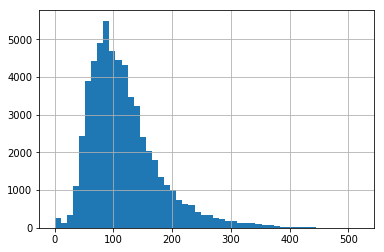

In [105]:
data['stop_word_num'].hist(bins=50)

In [127]:
data.loc[(data.stop_word_num < 10)]

Unnamed: 0              artist  \
348           348       Aiza Seguerra   
352           352       Aiza Seguerra   
353           353       Aiza Seguerra   
356           356       Aiza Seguerra   
358           358       Aiza Seguerra   
359           359       Aiza Seguerra   
786           786        Ariel Rivera   
2205         2205        Carol Banawa   
2208         2208        Carol Banawa   
2210         2210        Carol Banawa   
2334         2334         Celine Dion   
2345         2345         Celine Dion   
2942         2942     Christina Perri   
2976         2976     Christmas Songs   
3804         3804         David Bowie   
4179         4179             Dewa 19   
4181         4181             Dewa 19   
4183         4183             Dewa 19   
4184         4184             Dewa 19   
4185         4185             Dewa 19   
4186         4186             Dewa 19   
5052         5052       Elvis Presley   
5238         5238    Enrique Iglesias   
5412         5412         Erik Santos   
5414         5414         Erik Santos   
5421         5421         Erik Santos   
5422         5422         Erik Santos   
5423         5423         Erik Santos   
5424         5424         Erik Santos   
6441         6441     Freddie Aguilar   
...           ...                 ...   
45984       45984     Nine Inch Nails   
46144       46144                 Noa   
46413       46413               Oasis   
46559       46559           Ofra Haza   
46563       46563           Ofra Haza   
46565       46565           Ofra Haza   
46566       46566           Ofra Haza   
46681       46681  Olivia Newton-John   
46948       46948       Orphaned Land   
47857       47857          Perry Como   
49909       49909             Rainbow   
49949       49949           Rammstein   
50576       50576    Regine Velasquez   
50577       50577    Regine Velasquez   
50582       50582    Regine Velasquez   
50595       50595    Regine Velasquez   
50596       50596    Regine Velasquez   
50598       50598    Regine Velasquez   
50599       50599    Regine Velasquez   
50608       50608    Regine Velasquez   
50617       50617    Regine Velasquez   
50618       50618    Regine Velasquez   
50623       50623    Regine Velasquez   
51641       51641              Side A   
51646       51646              Side A   
54440       54440                Ungu   
56157       56157   The White Stripes   
57180       57180    Yeng Constantino   
57181       57181    Yeng Constantino   
57183       57183    Yeng Constantino   

                                             song  \
348                      Huwag Mong Iwan Ang Puso   
352                          Ikaw Ang Aking Mahal   
353                Ikaw Na Ang Bahala: Panalangin   
356                              Pakisabi Na Lang   
358                             Sa Huli Ang Sikat   
359                              Sa Ugoy Ng Duyan   
786                           Minamahal Pala Kita   
2205                             Hanggang Sa Muli   
2208                                  Ikaw Lamang   
2210                            Maala Ala Mo Kaya   
2334                        Je Ne Vous Oublie Pas   
2345                                    Mamy Blue   
2942                                    Ave Maria   
2976                   Il Est Ne, Le Divin Enfant   
3804                        Leon Takes Us Outside   
4179                                     Air Mata   
4181                               Aspirasi Putih   
4183                                Kasidah Cinta   
4184                                       Kirana   
4185                                   Lagu Cinta   
4186                                Roman Picisan   
5052                                  Guadalajara   
5238                  Se Te Ne Vai (Si Tu Te Vas)   
5412   Bakit Ba Iniibig Ka (Ft. Regine Velasquez)   
5414                           Huwag Na Lang Kaya   
5421                             Kung Maaalala Mo   
5422                           Ma

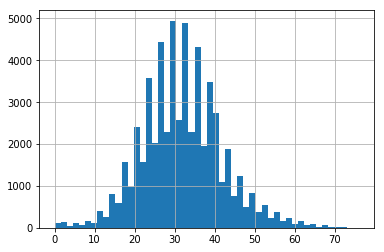

In [78]:
data['unique_stop_word_num'].hist(bins=50)

In [108]:
data.loc[(data.unique_stop_word_num < 10)]

Unnamed: 0             artist  \
19             19               ABBA   
72             72               ABBA   
348           348      Aiza Seguerra   
352           352      Aiza Seguerra   
353           353      Aiza Seguerra   
356           356      Aiza Seguerra   
358           358      Aiza Seguerra   
359           359      Aiza Seguerra   
377           377            Alabama   
736           736     Andrea Bocelli   
786           786       Ariel Rivera   
801           801       Arlo Guthrie   
1234         1234    Beautiful South   
1251         1251    Beautiful South   
1466         1466        Bing Crosby   
1812         1812           Boney M.   
2127         2127               Cake   
2205         2205       Carol Banawa   
2208         2208       Carol Banawa   
2210         2210       Carol Banawa   
2278         2278        Cat Stevens   
2298         2298        Celine Dion   
2307         2307        Celine Dion   
2334         2334        Celine Dion   
2337         2337        Celine Dion   
2338         2338        Celine Dion   
2339         2339        Celine Dion   
2345         2345        Celine Dion   
2609         2609            Chicago   
2651         2651            Chicago   
...           ...                ...   
52629       52629   System Of A Down   
52649       52649   System Of A Down   
53116       53116            Tiffany   
53125       53125            Tiffany   
54203       54203               UB40   
54382       54382       Uncle Tupelo   
54440       54440               Ungu   
54721       54721       Utada Hikaru   
54744       54744       Utada Hikaru   
54817       54817          Van Halen   
54860       54860           Vangelis   
54863       54863           Vangelis   
54944       54944              Venom   
54972       54972              Venom   
55634       55634          Waterboys   
55637       55637          Waterboys   
55793       55793               Ween   
55805       55805               Ween   
56139       56139  The White Stripes   
56157       56157  The White Stripes   
56390       56390                Who   
57110       57110              Yello   
57132       57132              Yello   
57180       57180   Yeng Constantino   
57181       57181   Yeng Constantino   
57183       57183   Yeng Constantino   
57184       57184                Yes   
57208       57208                Yes   
57373       57373           Yoko Ono   
57374       57374           Yoko Ono   

                                           song  \
19                        Fernando (In Spanish)   
72                        Pick A Bale Of Cotton   
348                    Huwag Mong Iwan Ang Puso   
352                        Ikaw Ang Aking Mahal   
353              Ikaw Na Ang Bahala: Panalangin   
356                            Pakisabi Na Lang   
358                           Sa Huli Ang Sikat   
359                            Sa Ugoy Ng Duyan   
377                       Down By The Riverside   
736                                       Sogno   
786                         Minamahal Pala Kita   
801                              Jacob's Ladder   
1234                        Big Beautiful South   
1251                                    Pollard   
1466   Oh Come All Ye Faithful (Adeste Fideles)   
1812                           Joy To The World   
2127                            Race Car Ya-Yas   
2205                           Hanggang Sa Muli   
2208                                Ikaw Lamang   
2210                          Maala Ala Mo Kaya   
2278                                   Rubylove   
2298                                     Carmen   
2307                             Glory Alleluia   
2334                      Je Ne Vous Oublie Pas   
2337                              La Religieuse   
2338                  Laissons Entrer Le Soleil   
2339                                  Le Ballet   
2345                                  Mamy Blue   
2609                          Dialogue (Part 2)

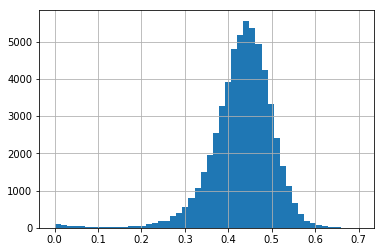

In [102]:
data['stop_word_frac'].hist(bins=50)
# This has an interesting weird tail.

In [109]:
data.loc[(data.stop_word_frac < 0.2)]

Unnamed: 0             artist  \
19             19               ABBA   
348           348      Aiza Seguerra   
352           352      Aiza Seguerra   
353           353      Aiza Seguerra   
356           356      Aiza Seguerra   
358           358      Aiza Seguerra   
359           359      Aiza Seguerra   
530           530    Alice In Chains   
736           736     Andrea Bocelli   
786           786       Ariel Rivera   
1117         1117         Beach Boys   
1134         1134         Beach Boys   
1135         1135         Beach Boys   
1172         1172         Beach Boys   
1176         1176         Beach Boys   
1466         1466        Bing Crosby   
1802         1802           Boney M.   
1811         1811           Boney M.   
2205         2205       Carol Banawa   
2208         2208       Carol Banawa   
2210         2210       Carol Banawa   
2297         2297        Celine Dion   
2298         2298        Celine Dion   
2307         2307        Celine Dion   
2334         2334        Celine Dion   
2337         2337        Celine Dion   
2338         2338        Celine Dion   
2339         2339        Celine Dion   
2345         2345        Celine Dion   
2651         2651            Chicago   
...           ...                ...   
52455       52455               Styx   
52495       52495               Styx   
52627       52627   System Of A Down   
52629       52629   System Of A Down   
53353       53353        Tina Turner   
54412       54412         Underworld   
54440       54440               Ungu   
54721       54721       Utada Hikaru   
54734       54734       Utada Hikaru   
54741       54741       Utada Hikaru   
54744       54744       Utada Hikaru   
54860       54860           Vangelis   
54868       54868           Vangelis   
54944       54944              Venom   
54972       54972              Venom   
55327       55327        Vybz Kartel   
55634       55634          Waterboys   
56157       56157  The White Stripes   
56164       56164  The White Stripes   
56279       56279    Whitney Houston   
56646       56646     Wilson Pickett   
56945       56945                XTC   
57110       57110              Yello   
57180       57180   Yeng Constantino   
57181       57181   Yeng Constantino   
57183       57183   Yeng Constantino   
57370       57370           Yoko Ono   
57389       57389           Yoko Ono   
57394       57394           Yoko Ono   
57398       57398           Yoko Ono   

                                           song  \
19                        Fernando (In Spanish)   
348                    Huwag Mong Iwan Ang Puso   
352                        Ikaw Ang Aking Mahal   
353              Ikaw Na Ang Bahala: Panalangin   
356                            Pakisabi Na Lang   
358                           Sa Huli Ang Sikat   
359                            Sa Ugoy Ng Duyan   
530                                Rotten Apple   
736                                       Sogno   
786                         Minamahal Pala Kita   
1117                                        409   
1134                               Barabara Ann   
1135                                Barbara Ann   
1172                                   Hushabye   
1176                               I Get Around   
1466   Oh Come All Ye Faithful (Adeste Fideles)   
1802                              Gotta Go Home   
1811                      Jambo - Hakuna Matata   
2205                           Hanggang Sa Muli   
2208                                Ikaw Lamang   
2210                          Maala Ala Mo Kaya   
2297                                  Ave Maria   
2298                                     Carmen   
2307                             Glory Alleluia   
2334                      Je Ne Vous Oublie Pas   
2337                              La Religieuse   
2338                  Laissons Entrer Le Soleil   
2339                                  Le Ballet   
2345                                  Mamy Blue

In [115]:
data.loc[(data.stop_word_frac < 0.2)].index

Int64Index([   19,   348,   352,   353,   356,   358,   359,   530,   736,
              786,
            ...
            56646, 56945, 57110, 57180, 57181, 57183, 57370, 57389, 57394,
            57398],
           dtype='int64', length=572)

All the different measures capture a number of songs not in english, though all of them capture a number not in english. Let's observe the impact of removing any of these. The values chosen for each number was eyeballed.

In [116]:
def remove_from_data(data, to_be_removed):
    return data.drop(to_be_removed.index)

In [119]:
def count_unique_words(data):
    text_values = data.t_corrected.values
    vocab = Counter()
    for song in text_values:
        vocab.update(song)
        
    return len(vocab.items())

In [123]:
da = remove_from_data(data, data.loc[(data.stop_word_num < 20)])
count_unique_words(da)

56876

In [122]:
db = remove_from_data(data, data.loc[(data.unique_stop_word_num < 10)])
count_unique_words(db)

55729

In [121]:
dc = remove_from_data(data, data.loc[(data.stop_word_frac < 0.2)])
count_unique_words(dc)

54968

In [138]:
dabc = remove_from_data(data, data.loc[(data.stop_word_num < 20)])
dabc = remove_from_data(dabc, dabc.loc[(data.unique_stop_word_num < 10)])
dabc = remove_from_data(dabc, dabc.loc[(data.stop_word_frac < 0.3)])
dabc_unique_num = count_unique_words(dabc)
dabc_song_num = len(dabc)
data_unique_num = count_unique_words(data)
data_song_num = len(data)

In [139]:
print("Unique words after removing undesired songs: ", dabc_unique_num)
print("Difference: ", (data_unique_num - dabc_unique_num))
print("\nNumer of songs: ", dabc_unique_num)
print("Difference: ", (data_song_num - dabc_song_num))

Unique words after removing undesired songs:  52446
Difference:  9553

Numer of songs:  52446
Difference:  2281
